# 📍Tensor Manipulation
'모두를 위한 딥러닝2'의 'Lab01 Tensor Manipulation'을 듣고 정리한 코드입니다.
  
* 강의 링크: https://www.youtube.com/watch?v=St7EhvnFi6c&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=2  
* 블로그 링크: https://gaga.tistory.com/203

In [64]:
import numpy as np
import torch

# 1D Array with NumPy

In [3]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [5]:
print("Rank of t:", t.ndim)
print("Shape of t:", t.shape)

Rank of t: 1
Shape of t: (7,)


# 2D Array with NumPy

In [6]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [7]:
print("Rank of t:", t.ndim)
print("Shape of t:", t.shape)

Rank of t: 2
Shape of t: (4, 3)


# 1D Array with PyTorch

In [8]:
# torch의 float형 tensor
t = torch.FloatTensor([0.,1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [10]:
print(t.dim()) # rank
print(t.shape) # shape
print(t.size()) # shape
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[3:])

1
torch.Size([7])
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


# 2D Array with PyTorch

In [13]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [14]:
print(t.dim()) # rank
print(t.size()) # shape
print(t[:, 1])
print(t[:, 1].size()) # 4개의 element를 가진 벡터
print(t[:, :-1])

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


# Broadcasting
matrix 간의 연산에서 더하기는 두 텐서 간의 크기가 같아야 한다. 그러나 불가피하게 딥러닝에서 다른 크기의 텐서에 대해서 사칙연산해야 하는 경우가 있다. 이를 위해서 PyTorch에서는 자동으로 크기를 맞춰서 연산을 수행하게 만드는 broadcasting 기능을 제공한다.
  
  
특정한 조건 하에서 연산에 사용되는 array 중 더 작은 array가 larger array로 "broadcast"되어 계산가능한 shape을 갖게 된다.

In [16]:
# Same shape
m1 = torch.FloatTensor([[3, 3]]) # |m1| = (1, 2)
m2 = torch.FloatTensor([[2, 2]]) # |m1| = |m2|
print(m1 + m2)

tensor([[5., 5.]])


In [17]:
# Vector + Scalar
m1 = torch.FloatTensor([[1, 2]]) # |m1| = (1, 2)
m2 = torch.FloatTensor([3]) # 3 -> [[3, 3]]로 변환, |m2| = (1,) -> (1, 2)
print(m1 + m2)

tensor([[4., 5.]])


In [19]:
# 2x1 Vector + 1x2 Vector
m1 = torch.FloatTensor([[1, 2]]) # |m1| = (1, 2) -> (2, 2)
m2 = torch.FloatTensor([[3], [4]]) # |m2| = (2, 1) -> (2, 2)
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


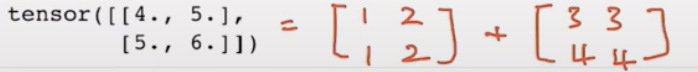

# Multiplication vs Matrix Multiplication
## Multiplication
원소 별 곱셉  
ex. m1.mul(m2), m1 * m2     
  
Broadcasting을 적용하여 곱한다.    
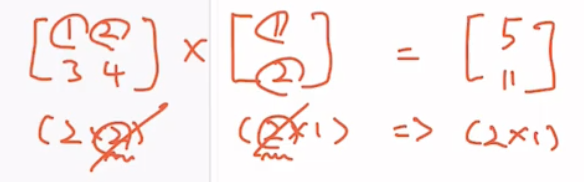  

## Matrix Multiplication
행렬 곱셉  
ex. m1.matmul(m2)  
  
우리가 흔히 하는 행렬곱을 한다.   
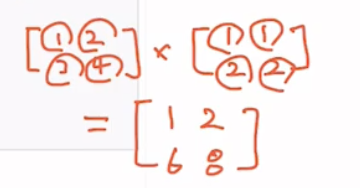

In [20]:
print("-------------")
print("Mul vs Matmul")
print("-------------")
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print("shape of matrix1:", m1.shape) # (2, 2)
print("shape of matrix2:", m2.shape) # (2, 1)
print(m1.matmul(m2)) # (2, 1)

print()

m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print("shape of matrix1:", m1.shape) # (2, 2)
print("shape of matrix2:", m2.shape) # (2, 1)
print(m1 * m2)
print(m1.mul(m2))

-------------
Mul vs Matmul
-------------
shape of matrix1: torch.Size([2, 2])
shape of matrix2: torch.Size([2, 1])
tensor([[ 5.],
        [11.]])

shape of matrix1: torch.Size([2, 2])
shape of matrix2: torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


# Mean

In [21]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [22]:
# Can't use mean() on integers
t = torch.LongTensor([1, 2])

try:
    print(t.mean())
except Exception as exc:
    print(exc)

mean(): input dtype should be either floating point or complex dtypes. Got Long instead.


In [23]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [25]:
print(t.mean()) # 전체
print(t.mean(dim=0)) # (2, 2) -> (1, 2) -> (2,)
print(t.mean(dim=1)) # (2, 2) -> (2, 1)
print(t.mean(dim=-1)) # (2, 2) -> (2, 1)

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


# Sum

In [26]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [27]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


# Max and Argmax
## Max
.max()에서 dim 키워드를 사용하면 argmax도 함께 리턴하는 특징을 갖고 있다.  
그래서 .max()의 0번째 인덱스는 max 값, 1번째 인덱스는 argmax 값이다.  
  
## Argmax
arguments of the maxima의 축약형  
최댓값의 인덱스를 나타내준다

In [66]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [67]:
print(t.max())

tensor(4.)


In [68]:
print(t.max(dim=0))
print()
print(t.max(dim=0)[0])
print(t.max(dim=0)[1])

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))

tensor([3., 4.])
tensor([1, 1])


In [31]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


# View (Reshape)
PyTorch에서 텐서의 view는 NumPy에서의 reshape과 같은 역할을 한다.  
즉, 원소의 수를 유지하면서 텐서의 크기를 변경한다.  

In [32]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])

ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [33]:
print(ft.view([-1, 3]))
print(ft.view([-1, 3]).shape) # (2, 2, 3) -> (4, 3)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [34]:
# reshape된 차원이 곱이 원본 행렬의 차원의 곱과 일치하기만 하면 된다.
print(ft.view([-1, 1, 3])) # (2, 2, 3) -> (4, 1, 3) 
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


# Squeeze
view 함수와 달리 dimension이 1인 경우에 해당 차원을 제거한다.  

In [35]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [36]:
print(ft.squeeze()) # (3, 1) -> (3, )
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


In [37]:
print(ft.squeeze(dim=0)) # 효과 없음

tensor([[0.],
        [1.],
        [2.]])


In [38]:
print(ft.squeeze(dim=1))

tensor([0., 1., 2.])


# Unsqueeze
특정 위치의 dimension에 1을 넣어준다. 이때, dimension을 명시해주어야 한다.  

In [39]:
ft = torch.Tensor([0, 1, 2]) 
print(ft.shape)

torch.Size([3])


In [40]:
print(ft.unsqueeze(0)) # (3, ) -> (1, 3)
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [41]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [42]:
print(ft.unsqueeze(1)) # (3, ) -> (3, 1)
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [43]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


# Type Casting
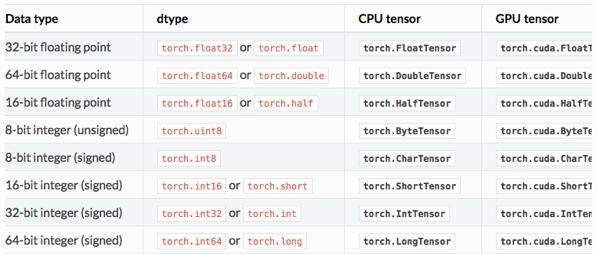

In [44]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [45]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [46]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [47]:
bt = (lt == 3)
print(bt)

tensor([False, False,  True, False])


In [48]:
print(bt.long())
print(bt.float())

tensor([0, 0, 1, 0])
tensor([0., 0., 1., 0.])


# Concatenate
두 텐서를 연결하는 방법  
torch.cat은 어느 차원을 늘릴 것인지를 인자로 줄 수 있다. 예를 들어 dim=0은 첫번째 차원을 늘리라는 의미를 담고있다.

In [76]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [77]:
x

tensor([[1., 2.],
        [3., 4.]])

In [78]:
y

tensor([[5., 6.],
        [7., 8.]])

In [79]:
torch.cat([x, y])

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])

In [80]:
print(torch.cat([x, y], dim=0)) # (2, 2) -> (4, 2)
print(torch.cat([x, y], dim=1)) # (2, 2) -> (2, 4)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


# Stacking
concatenate를 하는 또 다른 방법으로는 stacking이 있다. 
때로는 concatenate보다 stacking을 하는 것이 더 편리할 때가 있는데, 이는 stacking이 더 많은 연산을 포함하고 있기 때문이다.

In [81]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [82]:
x

tensor([1., 4.])

In [83]:
y

tensor([2., 5.])

In [84]:
z

tensor([3., 6.])

In [71]:
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [53]:
print(torch.stack([x, y, z], dim=2)) # 에러

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [72]:
# 두 연산은 동일
print(torch.stack([x, y, z])) 
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


# Ones and Zeros
0 또는 1로 채워진 텐서

In [85]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [86]:
print(torch.ones_like(x))
print(torch.zeros_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


# In-place Operation
연산 뒤에 \_를 붙이면 기존의 값을 덮어쓰기 한다.   
ex. x.mul_(2.)    
  
메모리에 새로 할당하지 않고 원래의 tensor 값에 선언한다.  
garbage collector가 pytorch에서 잘 구현되었기 때문에 속도 면에서 in-place operation을 사용하는 것이 그렇게 빠르지 않을 수도 있다.

In [87]:
print(x.mul(2.))
print(x)
print(x.mul_(2.))
print(x)

tensor([[0., 2., 4.],
        [4., 2., 0.]])
tensor([[0., 1., 2.],
        [2., 1., 0.]])
tensor([[0., 2., 4.],
        [4., 2., 0.]])
tensor([[0., 2., 4.],
        [4., 2., 0.]])


In [88]:
print(x.add_(2.))

tensor([[2., 4., 6.],
        [6., 4., 2.]])
